##  neural Network model to predict whether or not a customer will payback the loan.

## Problem statement
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), building a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

### Keras API project 
on LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.


### DATA INFORMATION:




<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>



In [1]:
import pandas as pd

### Information about the data

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
data_info.head(3)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan


In [3]:
print(data_info.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [4]:
def info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
info('mort_acc')

Number of mortgage accounts.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')

In [7]:
df=pd.read_csv('lending_club_loan_two.csv')
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## EDA

<AxesSubplot:xlabel='loan_status', ylabel='count'>

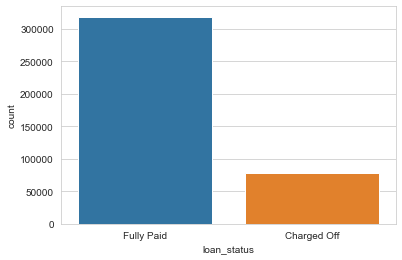

In [9]:
sns.countplot(x='loan_status',data=df)


<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

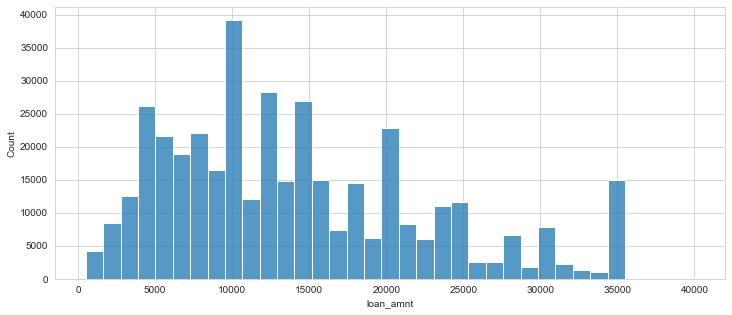

In [10]:
plt.figure(figsize=(12,5))
sns.histplot(x=df['loan_amnt'],kde=False,bins=35)

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

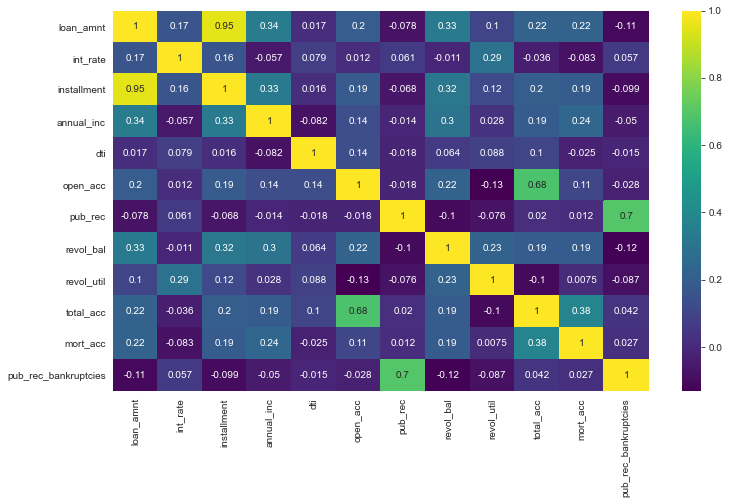

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [13]:
info('installment')

The monthly payment owed by the borrower if the loan originates.


In [14]:
info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

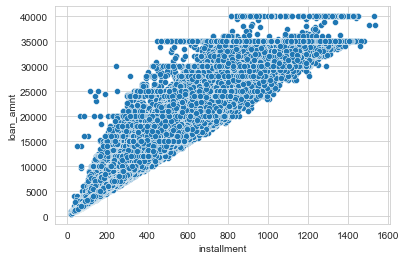

In [15]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

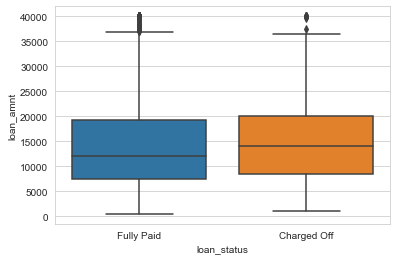

In [16]:
#checking relationship between amount  and loan status
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
#approx if loanamount high there are chances of not paying the loan back

In [17]:
#Exploring grade and subgrade columns
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [18]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

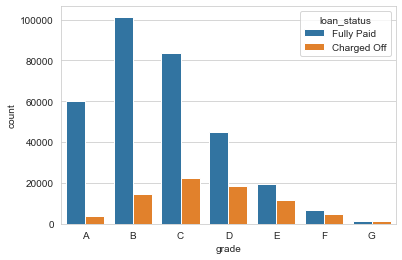

In [19]:
sns.countplot(x='grade',data=df,hue='loan_status',order=['A','B','C','D','E','F','G'])

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

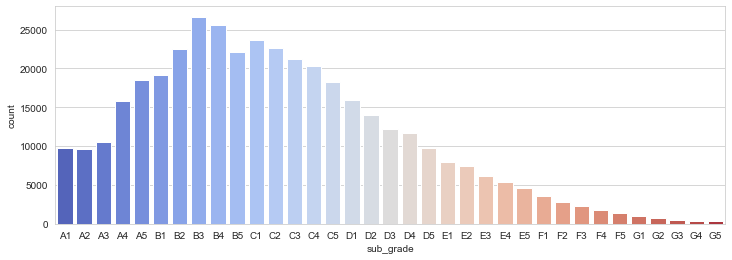

In [20]:
plt.figure(figsize=(12,4))
order_ = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = order_,palette='coolwarm' )

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

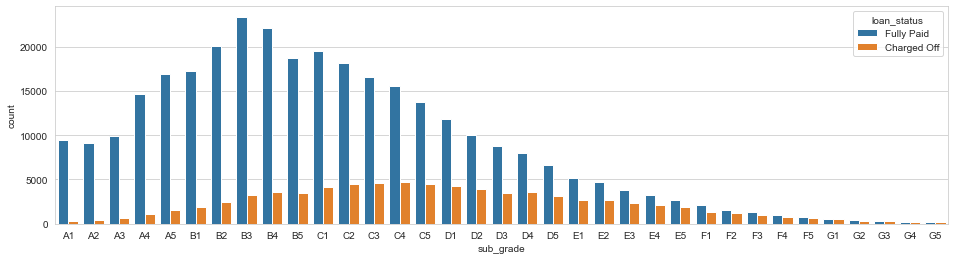

In [21]:
plt.figure(figsize=(16,4))
order_ = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = order_,hue='loan_status')

### Converting loan paid status as such 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [22]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [23]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [24]:
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


<AxesSubplot:>

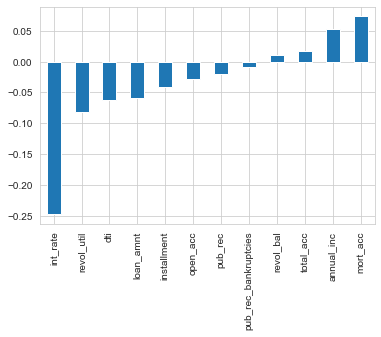

In [25]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## DATA PreProcessing

In [26]:
#length of dataframe
len(df)

396030

In [27]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [28]:
info('emp_title')
print('\n')
info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [29]:
df['emp_title'].nunique()
#A lot of unique titles,can't make these many dummy variables.

173105

In [30]:
#droping the emp_title column
df = df.drop('emp_title',axis=1)

In [31]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [32]:
#for making barplot
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

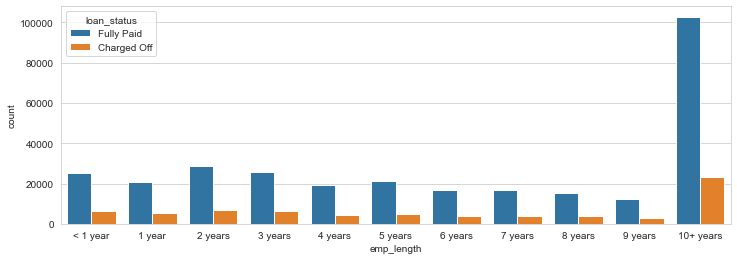

In [33]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')
#there not much difference on the basis of employment length

In [34]:
#further calculating the percentage of charge offs per category of emp_length.
#count of persons charged off per category of emp_length.
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
#count of persons fully paid per category of emp_length.
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [35]:
#calculating persentage of people who charged off per category
emp_len = emp_co/(emp_fp+emp_co)
emp_len
#there is not much difference in every category there are approx 19% charged offs.

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

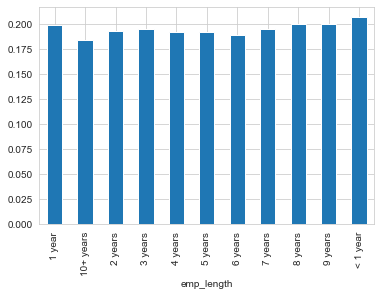

In [36]:
emp_len.plot(kind='bar')

In [37]:
#so droping of this column too.
df = df.drop('emp_length',axis=1)

In [38]:
#remaining missing points per columns
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [39]:
info('title')

The loan title provided by the borrower


In [40]:
info('purpose')

A category provided by the borrower for the loan request. 


In [41]:
#these both are basically the same so we can drop title.
df = df.drop('title',axis=1)

In [42]:
#now for mort_acc column.
info('mort_acc')

Number of mortgage accounts.


In [43]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [44]:
#seeing its correlation with other values.
df.corr()['mort_acc'].sort_values()
#It can be seen that mort_acc have considerable amount of correlation with total_acc.

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [45]:
#using total_acc to predict missing values in mort_acc
print("Mean of mort_acc column per total_acc")
mort_avg=df.groupby('total_acc').mean()['mort_acc']
mort_avg

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [46]:
#fuction to fill missing mort_acc values with the avg mort_acc value for the corresponding total_acc value for that row.
def mort_fill(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return mort_avg[total_acc]
    else:
        return mort_acc

In [47]:
df['mort_acc'] = df.apply(lambda x: mort_fill(x['total_acc'], x['mort_acc']), axis=1)

In [48]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [49]:
#now revol_util and pub_rec_bankruptcies missing values count is soo small that they can be dropped of .
df=df.dropna()

In [50]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical Variables 

In [51]:
#To see all string features
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### TERM FEATURE

In [52]:
info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [53]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [54]:
#Conveting it to 36 and 60.
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

In [55]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### Grade feature

In [56]:
#we will drop ot as sub grade feature also have same info
df = df.drop('grade',axis=1)

### SUB grade feature

In [57]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [58]:
df=pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [59]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [60]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### home_ownership

In [61]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [62]:
#lets add none and any to others category
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df['home_ownership'].value_counts()
#We'll create its dummy later.

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

### Address

In [63]:
df['address'].value_counts()

USS Johnson\nFPO AE 48052                                      8
USNS Johnson\nFPO AE 05113                                     8
USCGC Smith\nFPO AE 70466                                      8
USS Smith\nFPO AP 70466                                        8
USNS Johnson\nFPO AP 48052                                     7
                                                              ..
29399 Blair Pike\nNorth Taylor, OR 00813                       1
Unit 9442 Box 4068\nDPO AP 30723                               1
9969 Francis Mountain Apt. 636\nSouth Michaelstad, SC 11650    1
PSC 7446, Box 6958\nAPO AP 70466                               1
02400 Aaron Hills Suite 693\nHebertburgh, NY 11650             1
Name: address, Length: 392898, dtype: int64

In [64]:
#grabing only the pincode
df['address']=df['address'].apply(lambda address:address[-5:])
df['address'].value_counts()
#we'll create dummy later.

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: address, dtype: int64

### issue_d 

In [65]:
#as the loan is yet not approved so taking this data into consideration would be inappropriate
df = df.drop('issue_d',axis=1)

### earliest_cr_line

In [66]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jan-1953       1
Nov-1959       1
May-1958       1
Jul-1951       1
Aug-1958       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [67]:
#Lets grab only the year
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda year:int(year[-4:]))
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

### creating dummy variables of 
verification_status, application_type,  initial_list_status,
 purpose,  home_ownership,  address together.

In [68]:
l=['verification_status', 'application_type','initial_list_status','purpose','home_ownership','address']
dummy=pd.get_dummies(df[l],drop_first=True)

In [69]:
df = df.drop(l,axis=1)

In [70]:
df = pd.concat([df,dummy],axis=1)

In [71]:
df.select_dtypes(['object']).columns
#No column left as obejct except loan_status which we allready had coverted to loan_repaid column
# thus drop it 

Index(['loan_status'], dtype='object')

In [72]:
df = df.drop('loan_status',axis=1)

In [73]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

# Train Test Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values # target class

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Normalizing the Data

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()

In [79]:
X_train = scaler.fit_transform(X_train)

In [80]:
X_test = scaler.transform(X_test)

# Model Creation

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [82]:
model = Sequential()
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [83]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [84]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=260,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]

          )

Epoch 1/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.3056 - val_loss: 0.2652
Epoch 2/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.2659 - val_loss: 0.2625
Epoch 3/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.2632 - val_loss: 0.2624
Epoch 4/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.2619 - val_loss: 0.2618
Epoch 5/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.2608 - val_loss: 0.2615
Epoch 6/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.2603 - val_loss: 0.2619
Epoch 7/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.2601 - val_loss: 0.2614
Epoch 8/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.2594 - val_loss: 0.2616
Epoch 9/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.2591 - val_loss: 0.2613
Epoch 10/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.258

In [85]:
from tensorflow.keras.models import load_model
model.save('full_data_project_model.h5')  

## Evaluating Model Performance.

In [86]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

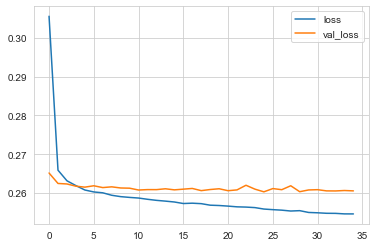

In [87]:
losses.plot()

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
predictions = model.predict_classes(X_test)

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044



In [94]:
confusion_matrix(y_test,predictions)

array([[ 7143,  8515],
       [  320, 63066]], dtype=int64)

## Trying to predict on one customer

In [151]:
import random
random.seed(102)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt        14400.00
term                36.00
int_rate            11.14
installment        472.40
annual_inc       60000.00
                   ...   
address_30723        0.00
address_48052        0.00
address_70466        0.00
address_86630        0.00
address_93700        0.00
Name: 77826, Length: 78, dtype: float64

In [152]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

In [153]:
df.iloc[random_ind]['loan_repaid']

1.0